# Empezar a experimentar

1. clases de repuestas cortas con 3 palabras que ocurren más de n veces (k clases)
    1. contexto de turnos anteriores del otro usuario hasta encontrar respuesta del mismo usuario
        1. unigramas (que ocurren más de m veces)
            1. unigramas (que ocurren más de 10 veces)
            2. unigramas (que ocurren más de 20 veces)
        2. unigramas (que ocurren más de m veces) y bigramas (que ocurren más de p veces)
        3. unigramas (que ocurren más de m veces) y bigramas (que ocurren más de p veces) y subwords (que ocurren más de r veces)
        4. subwords (que ocuren más de r veces)
    2. contexto de 1 turno anterior
        1. unigramas (que ocurren más de m veces)
            1. unigramas (que ocurren más de 10 veces)
            2. unigramas (que ocurren más de 20 veces)
        2. unigramas (que ocurren más de m veces) y bigramas (que ocurren más de p veces)
        3. unigramas (que ocurren más de m veces) y bigramas (que ocurren más de p veces) y subwords (que ocurren más de r veces)
        4. subwords (que ocuren más de r veces)
    3. contexto de 3 turnos anteriores
        1. unigramas (que ocurren más de m veces)
            1. unigramas (que ocurren más de 10 veces)
            2. unigramas (que ocurren más de 20 veces)
        2. unigramas (que ocurren más de m veces) y bigramas (que ocurren más de p veces)
        3. unigramas (que ocurren más de m veces) y bigramas (que ocurren más de p veces) y subwords (que ocurren más de r veces)
        4. subwords (que ocuren más de r veces)
    4. contexto de 10 turnos anteriores
        1. unigramas (que ocurren más de m veces)
            1. unigramas (que ocurren más de 10 veces)
            2. unigramas (que ocurren más de 20 veces)
        2. unigramas (que ocurren más de m veces) y bigramas (que ocurren más de p veces)
        3. unigramas (que ocurren más de m veces) y bigramas (que ocurren más de p veces) y subwords (que ocurren más de r veces)
        4. subwords (que ocuren más de r veces)
2. clases de respuestas cortas con 2 palabras que ocurren más de n veces (k clases)
3. clases de respuestas cortas con 1 palabra que ocurren más de n veces (k clases)

como primera iteración, hacer experimentos con:
- unigramas y bigramas de palabras y trigramas de letras (incluyendo espacios en blanco) (subwords) que ocurren más de m, p y r veces en el contexto, respectivamente
- contexto de 1, 3 y 10 turnos anteriores
- clases de 2 y 1-3 palabras

Cada experimento hacerlo con SVM, Logistic Regression, Decision Trees, Naïve Bayes

    - seleccionar del corpus los ejemplos que cumplan con esa condición (que ocurran más de k veces en el corpus), junto con su contexto 
    - dividir los ejemplos en training, tuning y test
    - definir clases objetivo
           - todo el rango de respuestas cortas posibles que ocurren más de n veces (para diferentes valores de n)
     

- implementar el pipeline de clasificador y evaluación (en función de las clases)
- buscar un clasificador que ofrezca múltiples resultados (múltiples clases)

## Clases de respuestas cortas con 3 palabras que ocurren más de 10 veces

In [1]:
from sklearn import svm
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import pandas as pd
import csv

In [2]:
df = pd.read_csv('turn1_short1_pre2.csv')

In [3]:
from scipy.sparse import load_npz

X = load_npz('BOG1.npz')

In [4]:
X.shape

(18781, 909)

In [5]:
y = df.label

In [6]:
from collections import Counter

Counter(y).most_common(20)

[('ja', 8882),
 ('ok', 1226),
 ('😂', 1190),
 ('si', 1004),
 ('?', 619),
 ('🤣', 469),
 ('no', 464),
 ('dale', 448),
 ('🤔', 359),
 ('aja', 343),
 ('gracias', 285),
 ('ah', 282),
 ('😱', 245),
 ('😁', 240),
 ('claro', 210),
 ('bueno', 197),
 ('hola', 177),
 ('sisi', 170),
 ('yo', 164),
 ('se', 162)]

In [7]:
train, target, train_test, target_test = X[:2000], y[:2000], X[2001:2050], y[2001:2050]

In [8]:
tsne = TSNE(n_components=2, random_state=0)
matrix = tsne.fit_transform(train.toarray())

In [13]:
matrix[0]

array([ -7.5015502 , -19.31419945], dtype=float32)

In [24]:
points = pd.DataFrame(
    [
        (coords[0], coords[1])
        for coords in matrix
    ],
    columns=["x", "y"]
)

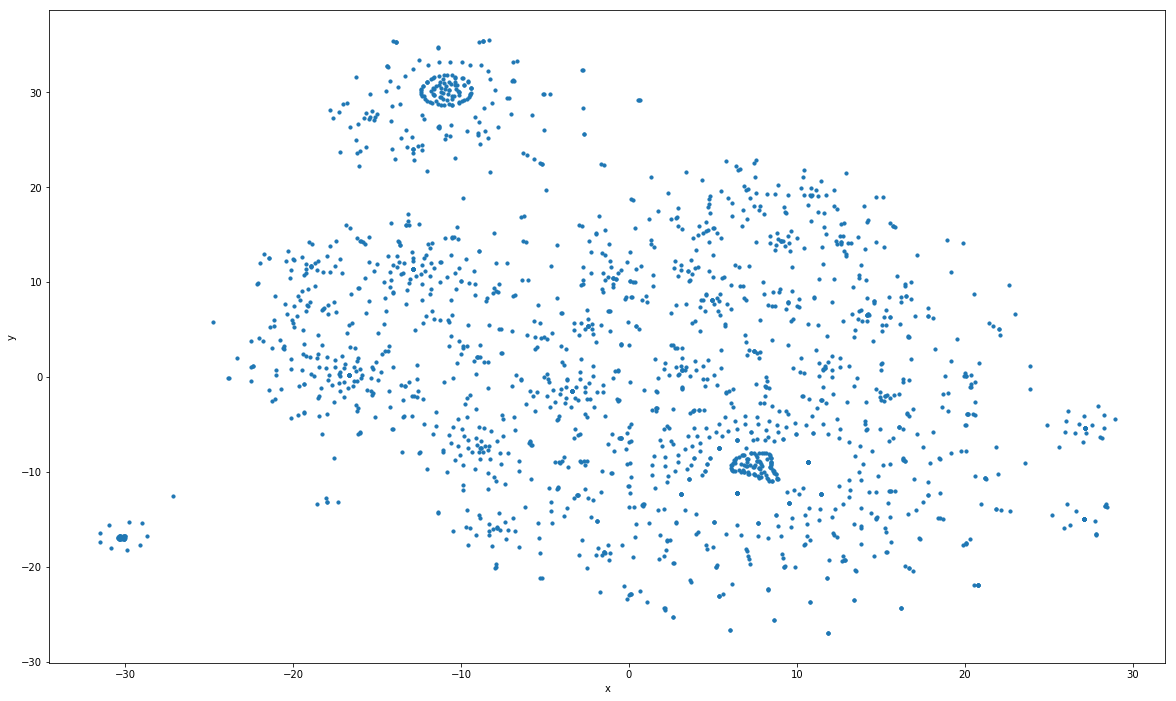

In [25]:
%matplotlib inline
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [9]:
(train.shape, len(target))

((2000, 909), 2000)

In [10]:
clf = svm.SVC(kernel="rbf", C=100, gamma=100)
result = clf.fit(train, target)

In [11]:
predicted = result.predict(train_test)
predicted

array(['ja', 'ja', '?', 'ja', 'ja', 'ja', 'ja', 'ja', 'ja', 'ja', 'ja',
       'ja', 'ja', 'ja', 'ja', 'ja', 'ja', '🤣', '😂', 'ja', 'ja', 'ja',
       'ja', 'ja', 'ja', 'ja', 'ja', 'ja', 'dale', 'aja', 'ja', 'ja', 'ja',
       'ja', 'ja', 'ja', 'ja', 'ja', 'ja', 'ja', 'ja', 'ja', 'ja', 'ja',
       'ja', 'ja', 'ja', '?', 'ja'], dtype=object)

In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(target_test, predicted)

0.32653061224489793

In [23]:
pre = pd.DataFrame(
    data={
        "context": list(df.context[2001:2050]),
        "label": list(df.label[2001:2050]),
        "pred": list(predicted)
    }
)
pre

,context,label,pred
0,😊,😘,ja
1,😍 bueno vamos no voy a entender nada ja,😘,ja
2,estas en la facu ?,sip,?
3,voy pa alla,ok,ja
4,ahi salgo,😱,ja
5,""" cifrado extremo a extremo """,ja,ja
6,estoy yendo para casa,😁,ja
7,te aviso cuando este cerca,ok,ja
8,sale,ja,ja
9,lo presenta hoy en el cabildo quiza el lunes e...,ja,ja
